In [2]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt

from dotenv import load_dotenv
load_dotenv('../../azimuth.env')
import os
import sys
sys.path.append(os.environ['PATH_ROOT'])
print('PATH_ROOT:', os.environ['PATH_ROOT'], ' has been added to sys.path')

# Set the style for publication-quality plots
plt.style.use('seaborn-v0_8-paper')  # Clean, professional style
plt.rcParams.update({
    'font.family': 'serif',  # Use serif fonts
    'font.serif': ['Arial'],  # Use Times New Roman
    'font.size': 8,         # Readable font size
    'axes.linewidth': 1.0,   # Thicker axes lines
    'axes.labelsize': 8,    # Size for axis labels
    'xtick.labelsize': 8,    # Size for x-tick labels
    'ytick.labelsize': 8,    # Size for y-tick labels
})


PATH_ROOT: /Users/thinhhoang/Documents/project-azimuth/  has been added to sys.path


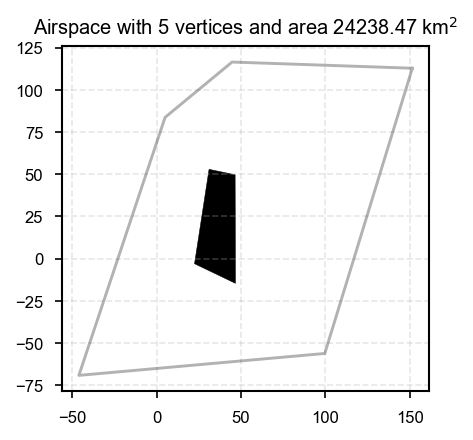

In [3]:
# Testing airspace radius sampling
import MARTINI.airspace.randomize_airspace as randomize_airspace
import MARTINI.airspace.geo as geo
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

# Generate a random airspace
airspace, area = randomize_airspace.generate_unit_polygon(5, 150)
# Get airspace centroid
centroid = geo.compute_polygon_centroid(airspace)
# Generate an obstacle
obstacle, area_obstacle = randomize_airspace.generate_unit_polygon(4, 35)
# Set the obstacle centroid to the airspace centroid
obstacle[:, 0] += centroid[0]
obstacle[:, 1] += centroid[1]

from ALPHA.obstacle.obstacle import Obstacle

obstacle_obj = Obstacle()
obstacle_obj.add_polygon(obstacle)

# Visualize the airspace
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
ax.plot(np.append(airspace[:, 0], airspace[0, 0]), 
             np.append(airspace[:, 1], airspace[0, 1]), 
             alpha=0.3, color='black')

# Plot the obstacle
ax.fill(np.append(obstacle[:, 0], obstacle[0, 0]), 
             np.append(obstacle[:, 1], obstacle[0, 1]), 
             color='black')
ax.set_title(f'Airspace with {len(airspace)} vertices and area {area:.2f} km$^2$')
ax.grid(True, linestyle='--', alpha=0.3)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

In [4]:
# Create an obstacle object
from ALPHA.obstacle.obstacle import Obstacle
from ALPHA.obstacle.reception import get_obstacle_indices_using_ray_intersection
obstacle_obj = Obstacle()
obstacle_obj.add_polygon(obstacle)

# Get the obstacle indices
obstacle_indices = get_obstacle_indices_using_ray_intersection(np.array([0, 0]), np.array([1, 0]), obstacle_obj)

print(f'Obstacle indices: {obstacle_indices}')

Obstacle indices: [0]


# Sampling actions

In [5]:
# Sample from obstacle avoidance policy
from ALPHA.obstacle.policy import sample_action
action = sample_action(obstacles=[obstacle_obj], intersecting_obstacle_indices=obstacle_indices,
                       max_distance=10.0, min_distance=5.0, num_samples=100)

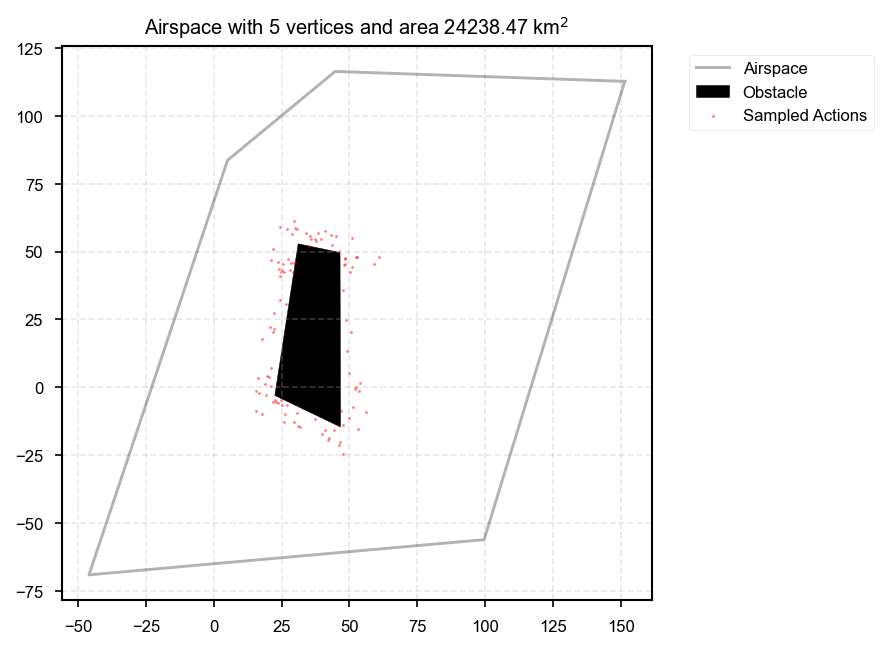

In [6]:
# Scatter plot the action
# Testing airspace radius sampling
import MARTINI.airspace.randomize_airspace as randomize_airspace
import MARTINI.airspace.geo as geo
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

# Generate a random airspace
airspace, area = randomize_airspace.generate_unit_polygon(5, 150)
# Get airspace centroid
centroid = geo.compute_polygon_centroid(airspace)
# Generate an obstacle
obstacle, area_obstacle = randomize_airspace.generate_unit_polygon(4, 35)
# Set the obstacle centroid to the airspace centroid
obstacle[:, 0] += centroid[0]
obstacle[:, 1] += centroid[1]

# Visualize the airspace
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
ax.plot(np.append(airspace[:, 0], airspace[0, 0]), 
             np.append(airspace[:, 1], airspace[0, 1]), 
             alpha=0.3, color='black')

# Plot the obstacle
ax.fill(np.append(obstacle[:, 0], obstacle[0, 0]), 
             np.append(obstacle[:, 1], obstacle[0, 1]), 
             color='black')

# Scatter plot the action
ax.scatter(action[:, 0], action[:, 1], color='red', s=1, alpha=0.5)
ax.set_title(f'Airspace with {len(airspace)} vertices and area {area:.2f} km$^2$')
ax.grid(True, linestyle='--', alpha=0.3)
ax.set_aspect('equal')

# Add legend
ax.plot([], [], color='black', alpha=0.3, label='Airspace')
ax.fill([], [], color='black', label='Obstacle') 
ax.scatter([], [], color='red', s=1, alpha=0.5, label='Sampled Actions')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

# Building a search tree

In [28]:
# Create a flight plan
from MARTINI.aircraft.flight_plan import FlightPlan
flight_plan = FlightPlan(waypoints=[(0, 0), airspace[0] * 1000], altitudes=[10000, 10000], speeds=[250, 250],
                         entry_time=0, entry_psi=0)
print(flight_plan)

Flight plan with 2 waypoints
Waypoint 0: [0. 0.]
Altitude: 10000
Speed: 250
Waypoint 1: [151507.49092251 112721.89529166]
Altitude: 10000
Speed: 250


In [29]:
import ALPHA.treesearch.tree as tree

MAX_ITER = 1

# Create a tree with flight plan as the state
my_tree = tree.Tree(root_state=flight_plan)


In [37]:
my_tree.evaluate_inherent_cost_for_all_nodes(obstacle_obj, airspace)
print('Inherent cost of root:', my_tree.root.inherent_cost)

Inherent cost of root: inf
